**Анализ гипотез для увеличения выручки интернет магазина**
=
Как аналитику крупного интернет-магазина нам предстоит исследовать список гипотез, подготовленный отделом маркетинга, для увеличения выручки, провести приоритезацию гипотез, исследовать качество  разделения на группы,  запустить A/B-тест и проанализировать результаты.

Приоритезация гипотез лежит в основе управления продуктом, стратегии его развития. Идей как улучшить продукт может быть много, редко менеджмент компании выбирает из двух гипотез, обычно их больше. Но как определить какая из них сильная идея а какая слабая? Какую идею тестировать и запустить в первую очередь. Ведь в бизнесе нельзя просто положиться на мнение коллег, начальников, интуицию и пользователей. Поэтому применяют простые проверенные методики расчета приоритетов ICE Scoring и RICE Scoring. 

Обе методики объединяют различные факторы: влияние на пользователей (улучшают конверсию, помогает привлечь новых, удержать старых, добавляет ценности продукту итд), уверенность что идея стоит реализации, затраты -то сколько сил, времени, ресурсов потребуется на реализацию, методика RICE добавляет еще один параметр - reach (охват ) на какое количество людей повлияют изменения, какой будет охват реализуемой идеи, это довольно важный показатель, помогает уменьшить субъективность метода ICE.

Часть. Приоритизация гипотез
-

**Описание данных**

Файл /datasets/hypothesis.csv. [Cкачать датасет](https://code.s3.yandex.net/datasets/hypothesis.csv)

**Hypothesis** — краткое описание гипотезы;  
**Reach** — охват пользователей по 10-балльной шкале;  
**Impact** — влияние на пользователей по 10-балльной шкале;  
**Confidence** — уверенность в гипотезе по 10-балльной шкале;  
**Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


In [2]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Приведем названия колонок к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()

Проведем приоритезацию гипотез с помощью фреймворка ICE (умножаем влияние на пользователей impact на уверенность в этом confidence и делим на значение стоимости теста efforts)

Рассчитываем ICE, результат записываем в отдельный столбец

In [5]:
data['ICE'] = round (data['impact']*data['confidence']/data['efforts'], 2)
display(data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)) # выводим на экран гипотезы в порядке приоритезации по ICE


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.20
0,"Добавить два новых канала привлечения трафика,...",13.33
7,Добавить форму подписки на все основные страни...,11.20
6,Показать на главной странице баннеры с актуаль...,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
1,"Запустить собственную службу доставки, что сок...",2.00
5,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,"Изменить структура категорий, что увеличит кон...",1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


In [6]:
pd.set_option('max_colwidth', 150) # увеличиваем максимальную ширину столбца
data.sort_values(by='ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Применим фреймворк RICE для приоритизации гипотез. При использовании этого фреймворка в множители числителя добавляем значение количества пользователей, которых затронут изменения, - reach

In [7]:
data['RICE'] = data['reach']*data['impact']*data['confidence']/data['efforts'] # рассчитываем RICE, результат записываем в отдельный столбец
display(data.sort_values(by='RICE', ascending=False)) # выводим на экран гипотезы в порядке приоритезации по RICE


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Видим, что гипотезы 7, 0, 6, 2 на первых позициях и в том и в другом списке, но в списке с RICE c наибольшим баллом гипотеза 7 а по методу ICE - гипотеза 8, это связано со значением охвата пользователей - reach, для гипотезы 7 reach 10 баллов поэтому и приоритет выше. 

Часть. Анализ A/B-теста
-

**Описание данных:**
Файл /datasets/orders.csv

**transactionId** — идентификатор заказа;

**visitorId** — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Сохраним полученные результаты АВ-теста в переменных

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Приведем тип данных в столбцах date в обоих датафреймах к типу datetime

In [10]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Посмотрим на распределение по группам

In [11]:
# отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
print(group_b)
print(group_a)
# получаем id пользователей, попавших в обе группы 
thesamegroup=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(thesamegroup)

      transactionId   visitorId       date  revenue group
0        3667963787  3312258926 2019-08-15     1650     B
1        2804400009  3642806036 2019-08-15      730     B
3        3797467345  1196621759 2019-08-15     9759     B
4        2282983706  2322279887 2019-08-15     2308     B
5         182168103   935554773 2019-08-15     2210     B
...             ...         ...        ...      ...   ...
1189     4082620617   393266494 2019-08-14    31550     B
1190       38478481  1197745035 2019-08-14     8600     B
1191     3592955527   608641596 2019-08-14    16490     B
1192     2662137336  3733762160 2019-08-14     6490     B
1196     3936777065  2108080724 2019-08-15   202740     B

[640 rows x 5 columns]
      transactionId   visitorId       date  revenue group
2        2961555356  4069496402 2019-08-15      400     A
7        2626614568    78758296 2019-08-15     1044     A
8        1576988021   295230930 2019-08-15    13710     A
10       3649131742   879864040 2019-08-15     4

58

У нас достаточно большие выборки по группам - 640 и 557 человек. 58 пользователей попали в обе группы , удалим их чтобы исследование было точнее.

In [12]:
orders = orders.query('visitorId not in @thesamegroup')

**1. График кумулятивной выручки по группам**

Чтобы построить график кумулятивной выручки по группам, необходимо собрать кумулятивные данные.
Объявим датафрейм cumulativeData со столбцами: 

date — дата;

group — группа A/B-теста;

orders — кумулятивное количество заказов на указанную дату в указанной группе;

buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);

visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [13]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 

In [14]:
# получим агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [15]:
# аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [16]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


Построим график кумулятивной выручки по дням и группам

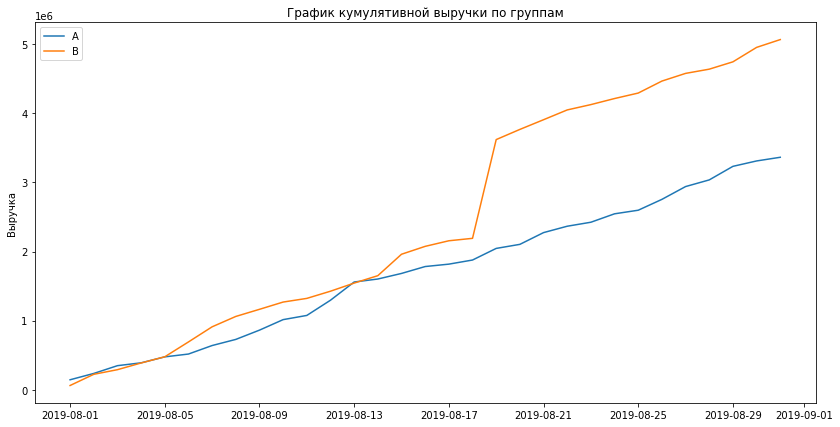

In [17]:
import matplotlib.pyplot as plt
plt.rcParams ['figure.figsize'] = [14, 7]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.legend();


Видим, что кумулятивная выручка в начале теста показывает близкие значения в обоих группах, после 17.08 
у группы B наблюдается резкий всплеск, который может быть связан с резким увеличением количества заказов либо c появлением очень дорогих заказов в группе.
После выброса значения выручки в обоих группах стабилизируются и  продолжают рост без выбросов.

**2. График кумулятивного среднего чека по группам**

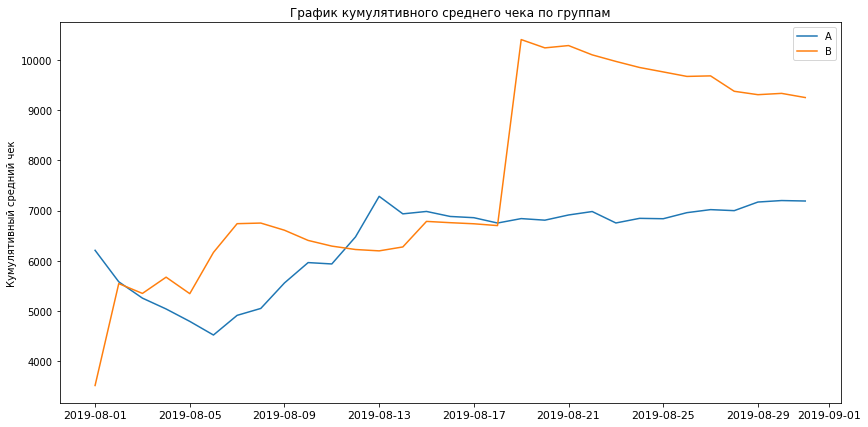

In [18]:
# разделим кумулятивную выручку на кумулятивное число заказов в каждой группе и выведем график

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')


plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=11)

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивный cредний чек')
plt.legend();


Видим стабильный рост среднего чека в обеих группах до середины месяца, затем резкий всплеск значения среднего чека в группе В в районе 18.08 и плавное снижение, в группе А средний чек держится в коридоре во второй половине месяца, без значительного роста.

**3. График относительного изменения кумулятивного среднего чека группы B к группе A**

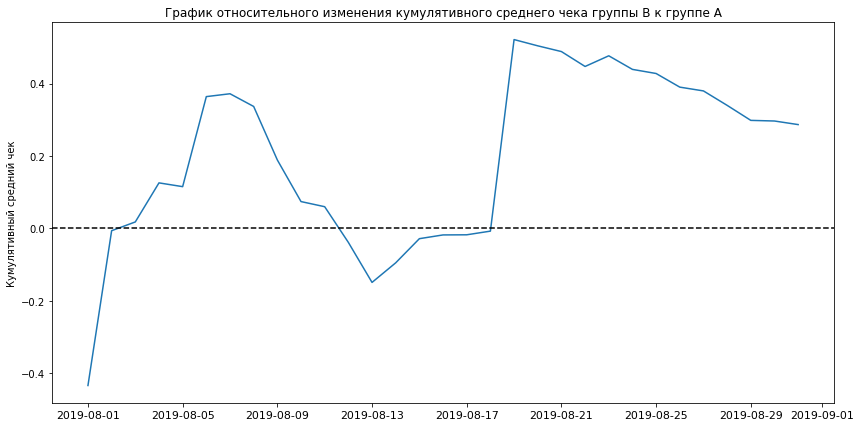

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=11)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Кумулятивный cредний чек');

График показывает что большую часть теста кумулятивный средний чек группы B выше относительно группы А, видим два больших всплеска значений в районе 06.08 и еще больший в районе 19.08, догадка о больших заказах и выбросах в группе В скорее всего верна, после выброса значение снижается и стремится выровниться.

**4. График кумулятивного среднего количества заказов на посетителя по группам**

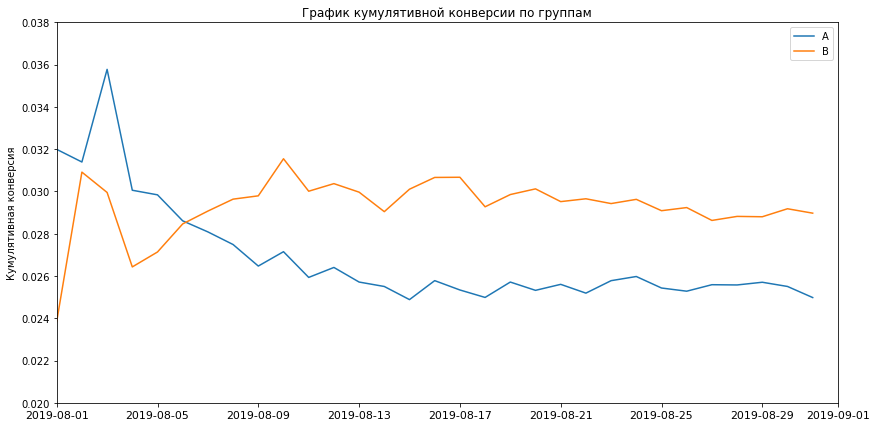

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=11)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.020, 0.038])

plt.title('График кумулятивной конверсии по группам')
plt.ylabel('Кумулятивная конверсия');

В начале теста наблюдаем заметные колебания в обеих группах, конверсия у группы А была больше группы B, но уже к концу первой недели теста конверсия группы В выросла, а группы А снизилась, после чего графики стабилизировались.
К 12 августа различие в конверсии двух групп очевидно и уже показатели не меняются,- конверсия у группы В стабильно лучше по накопленным данным чем конверсия группе A.

5. График относительного изменения кумулятивного среднего количества заказов на посетителя (конверсии) группы B к группе A

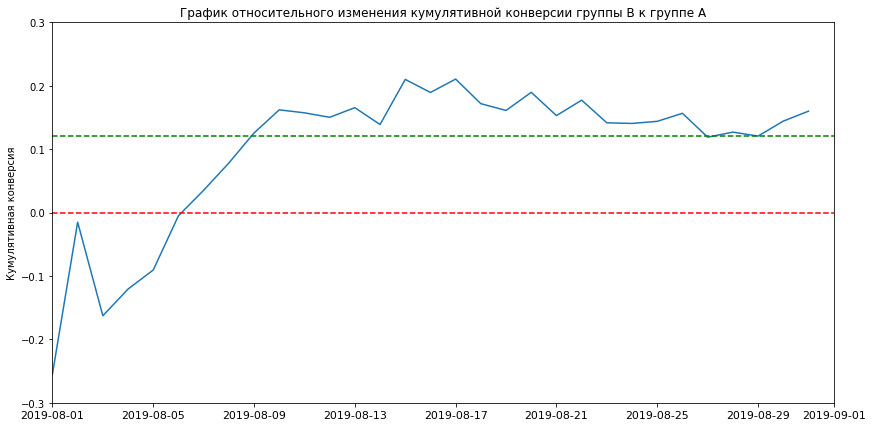

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.12, color='green', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=11)

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Кумулятивная конверсия');


В начале теста кумулятивная конверсия группа В меньше группы А, но уже с 6 августа вырвалась вперед и стабильно росла до 15.08-17.08, после видим плавное снижение, стабилизацию после 21.08 и в конце месяца заметный рост.

Отношение конверсии на протяжении большей части теста движется в коридоре 12-20% в пользу B. На этом этапе не будем делать однозначный вывод что кумулятивная конверсия группы В лучше группы А, но выглядит интересно.

**6. Точечный график количества заказов по пользователям**

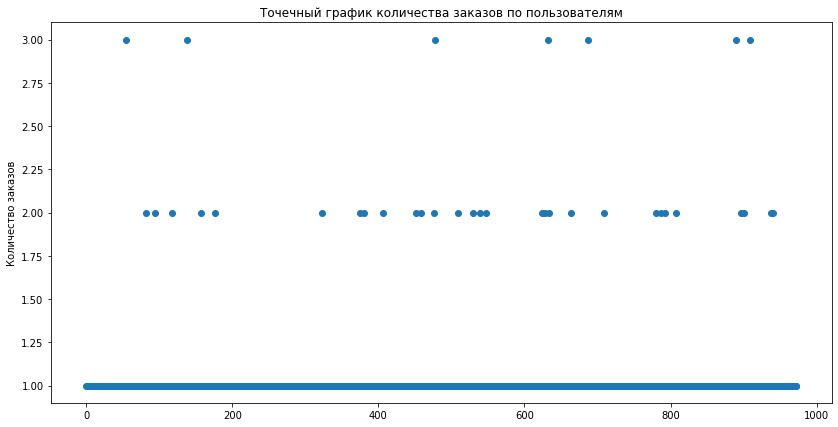

In [22]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов');

In [23]:
ordersByUsers.sort_values(by='orders', ascending=False).head(15)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [24]:
ordersByUsers.describe()

,visitorId,orders
count,9.730000e+02,973.000000
mean,2.118387e+09,1.044193
std,1.221446e+09,0.238090
min,5.114589e+06,1.000000
25%,1.028756e+09,1.000000
50%,2.138109e+09,1.000000
75%,3.141508e+09,1.000000
max,4.283872e+09,3.000000


Большинство пользователей совершали один заказ, редко два заказа и еще реже три, больше трех похоже на выбросы, для дальнейшего исследования наличия аномальных выбросов мы можем посчитать выборочные перцентили количества заказов на одного пользователя.

**7.Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**


In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не больше 5% пользователей оформляли больше одного заказов и не более 1% пользователей - больше 2 заказов. Определим 1 заказа на одного пользователя за нижнюю границу нормального распределения.

**8. Построим точечный график стоимостей заказов**

In [26]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


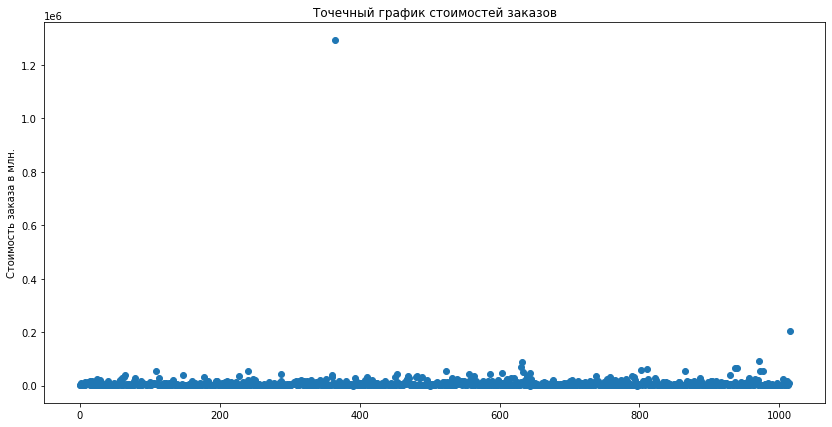

In [37]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.');

Видим два больших заказа в верху списка - на 1 294 500 и 202 740 в группе В, все остальные заказы не превышают 100 тысяч.

Посмотрим на график стоимостей заказов без двух крупных выбросов по группам

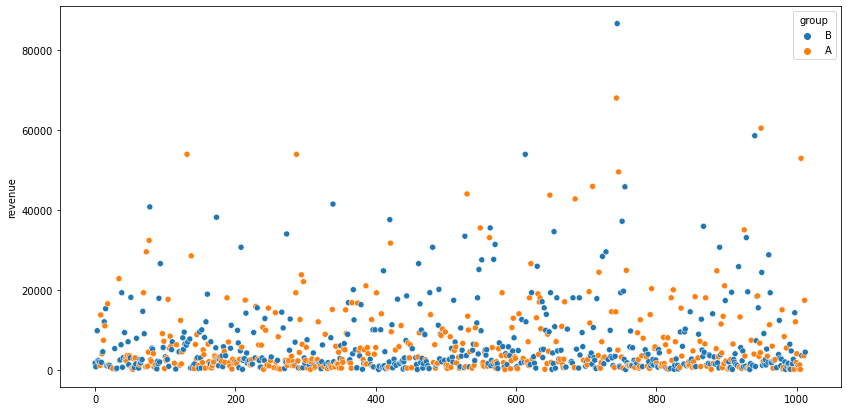

In [55]:
orders_new = orders.query('revenue <= 100000')
sns.scatterplot(data=orders_new, x = pd.Series(range(0, len(orders_new['revenue']))),y="revenue", hue="group");

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [28]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не больше 5% заказов совершались на сумму более 27 000 и не более 1% на сумму 54 000, определим границу в 27000 для отсечения аномальных заказов.

**10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

Применим тест U-критерий Манна — Уитни, который проранжирует две выборки по порядку от меньшего к большему и сравнит ранги одних и тех же значений, попавших в обе выборки, оценит сумму рангов нетипичных сдвигов.

H0:Конверсии групп A и B равны, статистически значимых отличий нет 

H1:Конверсии групп A и B различны, статистически значимые отличия есть

In [29]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



In [30]:
# зададим уровень значимости 5%
alpha=0.05

print('P-значение:',stats.mannwhitneyu(sampleA, sampleB)[1])

print('Pазница между группами:',"{0:.2f}".format(sampleB.mean() / sampleA.mean() - 1))

P-значение: 0.011018084110014696
Pазница между группами: 0.16


Вывод о статистической значимости различий конверсии между группами по сырым данным: 

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что конверсии равны и статистически значимых различий в конверсии между группами нет **отвергаем**. 
Относительное отставание группы A составляет 16%.

**11.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

H0:Средние чеки групп A и B равны, статистически значимых отличий нет 

H1:Средние чеки групп A и B различны, статистически значимые отличия есть

In [31]:
# зададим уровень значимости 5%
alpha=0.05
print('P-значение:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Pазница между группами:','{0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


P-значение: 0.829
Pазница между группами: 0.29


Первое число — p-value = 0.829 значительно больше 0.05. Значит, нулевую гипотезу о том, что средние чеки равны и статистически значимых различий между группами в размере среднего чека нет **принимаем**.

Средний чек группы B значительно выше чем у группы А на 29%, мы помним что в группе B были аномально крупные заказы, интересно будет проверить результаты на очищенных данных.

**12.Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

Мы определили ранее, что аномальные пользователи  те, кто совершил более 1 заказа или совершил заказ дороже 27 000 рублей. Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 27 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [32]:
max_order = int(np.percentile(ordersByUsers['orders'], [95]))
max_revenue = int(np.percentile(orders['revenue'], [95]))
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > max_order]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > max_order]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > max_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
86


Получили 86 аномальных пользователей. Посмотри на результаты по очищенным данным.

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

**H0:Конверсии групп A и B равны, статистически значимых отличий нет**

H1:Конверсии групп A и B различны, статистически значимые отличия есть 



In [33]:
#подготовим выборки количества заказов на одного пользователя по обеим группам
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим тест U-критерий Манна — Уитни

In [34]:
# зададим уровень значимости 5%
alpha=0.05
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.2f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.016
0.17


Результаты по конверсии сильно не изменились. p-value стал чуть больше, предыдущий вывод не меняется, статистически значисые различия между конверсиями двух групп есть. Отставание группы A на очищенных данных немного увеличился: 17% против 16% на сырых.

**13.Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

**H0:Средние чеки групп A и B равны, статистически значимых отличий нет** 

H1:Средние чеки групп A и B различны, статистически значимые отличия есть 


In [35]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.2f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.727
-0.03


Видим, что p-value немного уменьшился, но по прежнему значительно выше 0,05. 
Разница среднего чека по группам сильно изменилась - она упала с 29% в пользу B до 3% в пользу группы A! Это подтверждает, что статистически значимых различий среднего чека между группами нет, а наблюдаемая на неочищенных данных большая разница ожидаемо связана с выбросами. 

Критерий Манна-Уитни ранговый поэтому он устойчив к выбросам. Это означает, что данные ранжируются, выброс будет просто распознаваться как случай, который ранжируется на единицу выше (или ниже) следующего наблюдения, поэтому сильного влияния на p-value выбросы не оказывают.

**14. Выводы и решения по результатам теста**

Мы исключали 58 человек, попавших в обе группы для исследования.

Исследование показало аномальные выбросы в группе В.

График различия кумулятивной конверсии двух групп показал, что результаты группы B лучше группы A почти на протяжении всего теста и есть тенденция к еще большей разнице.

График различий кумулятивного среднего чека показал преимущество группы B, отметили несколько резких всплесков, после чего метрика начала снижаться и стремится выровниться.

Есть статистически значимые различия по конверсии между группами (как по сырым так и по очищенным данным), при этом преимущество у группы B в районе 16-17%.

Нет статистически значимых различий по среднему чеку между группами (как по сырым так и по очищенным данным).Очищенные от аномальных выбросов данные убрали преимущество группы В.

Исходя из вышесказанного тест следует остановить и признать его успешным в части улучшения конверсии в целевой группе B. В части среднего чека нельзя утверждать, что какая - либо из групп имеет большое преимущество над другой. Оснований полагать, что при продолжении теста разница между группами в конверсиях либо разница  среднего чека значительно изменится нет, имели место редкие аномальные выбросы, которые и объяснили резкие колебания на графиках.